In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline





In [2]:
# Load the dataset
tips = sns.load_dataset('tips')

# Separate features and target (for classification, we can use 'tip' being above the median as the target)
tips['tip_above_median'] = (tips['tip'] > tips['tip'].median()).astype(int)

In [3]:
X = tips.drop(columns=['tip', 'tip_above_median'])
y = tips['tip_above_median']

In [4]:
numeric_features = ['total_bill', 'size']
categorical_features = ['sex', 'smoker', 'day', 'time']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
X_train.head()

,total_bill,sex,smoker,day,time,size
228,13.28,Male,No,Sat,Dinner,2
208,24.27,Male,Yes,Sat,Dinner,2
96,27.28,Male,Yes,Fri,Dinner,2
167,31.71,Male,No,Sun,Dinner,4
84,15.98,Male,No,Thur,Lunch,2


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [8]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

In [9]:
# Fit the model
knn_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['total_bill', 'size']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])])),
                ('classifier', KNeighborsClassifier())])

In [11]:
y_probs_knn = knn_pipeline.predict_proba(X_test)[:, 1]


In [12]:
# Calculate the ROC curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_probs_knn)
auc_knn = roc_auc_score(y_test, y_probs_knn)

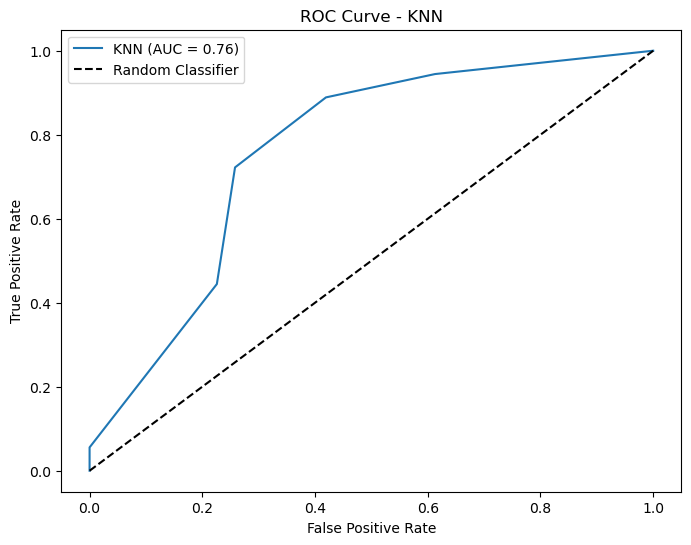

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()

In [14]:
auc_knn

0.7589605734767025

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score


In [16]:
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [17]:
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['total_bill', 'size']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])])),
                ('classifier', LogisticRegression())])

In [18]:
# Predict on the test set
y_pred_logreg = logreg_pipeline.predict(X_test)
y_probs_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]

# Calculate RMSE
rmse_logreg = mean_squared_error(y_test, y_pred_logreg, squared=False)

# Calculate F1 score
f1_logreg = f1_score(y_test, y_pred_logreg)

rmse_logreg, f1_logreg

(0.5345224838248488, 0.6666666666666666)